[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/stammler/ml_intro/HEAD?labpath=notebooks%2F2_pca_example.ipynb)

# Principle Component Analysis – An Example

This is a simple example to show how powerful PCA is.

For the local elections 2020 in Munich, the Süddeutsche Zeitung provided a ["Wahlcheck"](https://www.sueddeutsche.de/muenchen/kommunalwahl-muenchen-2020-interaktive-wahlhilfe-1.4806586).  
For this they gave the 16 parties and lists competing in the Munich elections 30 political statements, for which they could state "agree", "disagree", or "neutral". Readers could do the same task to see which party they have the greatest aggreement with.

Those were the statements. Translated to English with [DeepL](https://deepl.com/).

In [1]:
import numpy as np

In [2]:
long = np.array([
    u"From 2025, only cars belonging to residents or with special permits will be allowed to drive within the Mittlerer Ring.",
    u"New commercial areas should no longer be designated in Munich.",
    u"The city should ban panhandling throughout the downtown area.",
    u"The city needs more resident parking garages.",
    u"The city is to ban barbecuing with charcoal on the Isar River. Barbecuing with gas remains permitted in the designated zones.",
    u"The city is to build a cable car on the Frankfurter Ring as a means of local transportation.",
    u"The city should allow more beer gardens and small cafés on the banks of the Isar.",
    u"It will be good for the city if new high-rises are built that rise well above 100 meters.",
    u"The city should prevent the establishment of further large corporations.",
    u"If the city cuts child care costs, all parents must be treated equally - even if their children attend more expensive private daycares.",
    u"The city should comprehensively renovate the Gasteig cultural center, even if it costs half a billion euros or more.",
    u"The city should create new housing for at least 50,000 people on the last large tracts of undeveloped land in the northeast (600 hectares) and north (900 hectares).",
    u"Companies that locate in Munich should be required to build company housing for their employees.",
    u"The city should work to ensure that 'non-performing profits' due to increase in the value of building plots can be skimmed off. For example, in order to create affordable housing.",
    u"When locating businesses, their environmental sustainability should be the deciding factor.",
    u"Every new building in Munich is to be equipped with photovoltaic systems on a mandatory basis.",
    u"The city must increase the business tax in order to invest the additional funds in housing.",
    u"The city should create more counseling and support services for refugees.",
    u"The city should eliminate parking spaces for additional bus lanes and bike lanes.",
    u"Munich is to build a sports hall for 2500 spectators in the Olympic Park instead of the ice sports center.",
    u"In view of the increasing number of elderly people needing care, the city is to build new municipal nursing homes.",
    u"In order to create housing and build more densely, the city should show less consideration for opposition in each affected neighborhood with an eye toward the common good.",
    u"The city should continue to buy houses in a big way to protect tenants from luxury renovations.",
    u"Gay and lesbian traffic light figurines and rainbow strip crosswalks are to be permanently installed on individual streets.",
    u"The city should provide non-commercial organizers with space for parties and events.",
    u"Munich is to take in a limited number of underage, pregnant or traumatized refugees for humanitarian reasons.",
    u"The 365-euro ticket for local public transport is to be introduced for all Munich residents.",
    u"Children at secondary schools in the city should be educated about different lifestyles, including those of the same sex.",
    u"Municipal outdoor and indoor swimming pools should be free for children and young people up to the age of 18.",
    u"Mandatory vaccination of children is to apply in municipal facilities."
])

These are shortend versions of the statements for plotting later.

In [3]:
short = np.array([
    u"Car-free Mittlerer Ring",
    u"No new commercial areas",
    u"Ban panhandling in city center",
    u"More resident parking garages",
    u"No BBQ with charcoal at Isar",
    u"Cable car at Frankfurter Ring",
    u"More beer gardens/cafés at Isar",
    u"High-rise buildings above 100m",
    u"No new large corporations",
    u"Cut child care costs for all equally",
    u"Renovate cultural center at Gasteig",
    u"New housing on undeveloped land",
    u"Require companies to build company housing for employees",
    u"Skim off non-performing profits",
    u"Require environmental sustanability of new businesses",
    u"Require photovoltaic systems on new buildings",
    u"Increase business tax to invest in housing funds",
    u"More support for refugees",
    u"Bus and bike lanes instead of parking spots",
    u"Sports hall instead of ice sports center in Olympic park",
    u"More municipal nursing homes",
    u"Less consideration for opposition when building new housing",
    u"Continue buying houses to protect tenants",
    u"LGBTQ traffic lights and crosswalks",
    u"Provide space for parties and events to non-commercial organizers",
    u"Take underaged, pregnant, and traumatized refugees",
    u"365€ public transport ticket for everyone",
    u"Educate children about different lifestyles",
    u"Swimming pool for free for young people up to the age of 18",
    u"Mandatory vaccination of children in municipal facilities"
])

This is how the parties answered with 1 (agree), 0 (neutral), and -1 (disagree).

In [4]:
data = {
    u"Zusammen Bayern": np.array([ 1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1]),
    u"Die Linke":       np.array([ 1,  1, -1, -1,  0, -1, -1, -1,  1,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1]),
    u"Volt":            np.array([ 1, -1, -1,  0,  0,  0,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]),
    u"mut":             np.array([ 1,  0, -1, -1,  0,  0,  0,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1, -1,  1,  1,  1,  1,  1,  1,  1,  0]),
    u"Die PARTEI":      np.array([ 1,  0,  0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]),
    u"ÖDP":             np.array([ 1,  1,  0,  0,  1, -1, -1, -1,  1,  1,  1, -1,  1,  0,  1,  1,  0,  1,  1,  0,  0, -1,  1,  1,  1,  1,  1,  1,  0,  0]),
    u"Grüne":           np.array([ 0,  0, -1,  1, -1,  0,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1, -1,  1,  1,  0,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1]),
    u"Rosa Liste":      np.array([ 0, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  0,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  0]),
    u"Freie Wähler":    np.array([ 0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  1, -1,  1,  1,  0,  0, -1,  0,  0,  0,  0, -1,  1,  0,  1,  1,  1,  1,  1,  1]),
    u"SPD":             np.array([-1, -1,  0,  1,  1,  1,  0,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]),
    u"München-Liste":   np.array([-1,  1,  1, -1,  0, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  0,  1,  1,  1, -1,  1, -1,  0,  1,  1,  1,  1,  1]),
    u"Fair":            np.array([-1,  0,  1,  1, -1, -1,  0,  0, -1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  1, -1,  1,  1,  1, -1,  1,  0]),
    u"Bayernpartei":    np.array([-1,  0,  1,  1, -1,  0, -1,  0,  1, -1,  1, -1,  0, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  0,  1,  1,  1]),
    u"FDP":             np.array([-1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  0,  0,  0,  1, -1,  1,  1,  1, -1,  1, -1,  1]),
    u"CSU":             np.array([-1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0, -1,  0,  1,  0,  0,  1,  1,  1,  1]),
    u"AfD":             np.array([-1, -1,  1,  1, -1,  0,  1, -1, -1,  1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  1, -1,  0, -1, -1, -1, -1, -1, -1,  0])
}

Bringing this into a usable format.

In [5]:
X = []
for val in data.values():
    X.append(val)
X = np.array(X)

In [6]:
N, Q = X.shape

We can now calculate the covariance matrix using `numpy.cov`, which is doing what we have previously done by hand.

In [7]:
cov_X = np.cov(X.T)

Here is a plot of the covariance matrix to show its structure.

In [8]:
import matplotlib.pyplot as plt

In [9]:
def plot_cov(Sigma, title=None):
    fig = plt.figure(dpi=150)
    ax = fig.add_subplot(111)
    ax.axis("off")
    plot = ax.imshow(Sigma, cmap="inferno", vmin=np.minimum(Sigma.min(), 0))
    cbar = plt.colorbar(plot)
    if title is not None:
        ax.set_title(title)
    fig.tight_layout()

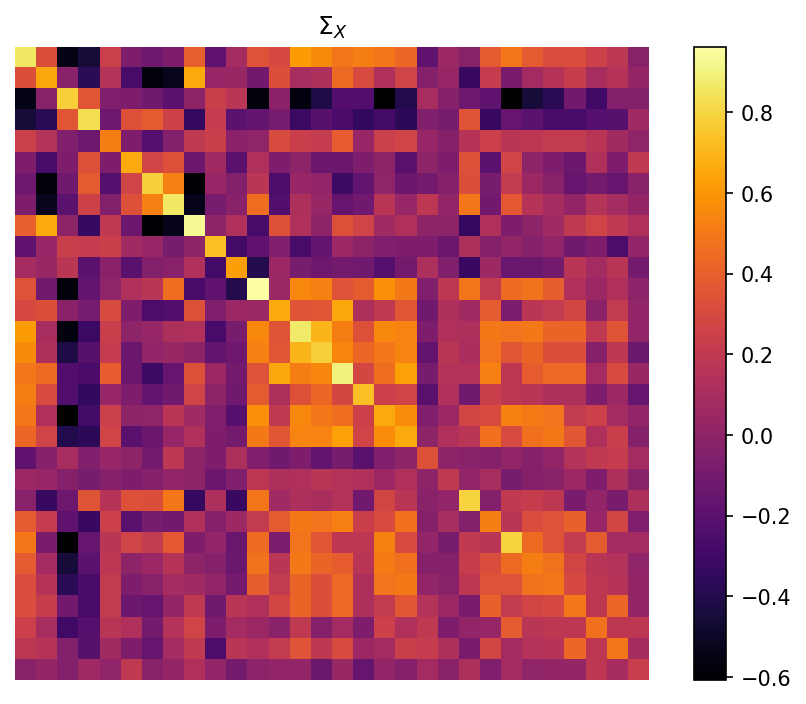

In [10]:
plot_cov(cov_X, title="$\Sigma_X$")

We are now diagonalizing the covariance matrix using `sklearn`.

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA()

In [13]:
Y = pca.fit_transform(X)

Note, that we only have 16 components, depsite our data having 30 features, because it would not make sense to have more components than samples.

In [14]:
X.shape, Y.shape

((16, 30), (16, 16))

The covariance matrix is now diagonal.

In [15]:
Y.shape

(16, 16)

In [16]:
cov_Y = np.cov(Y.T)

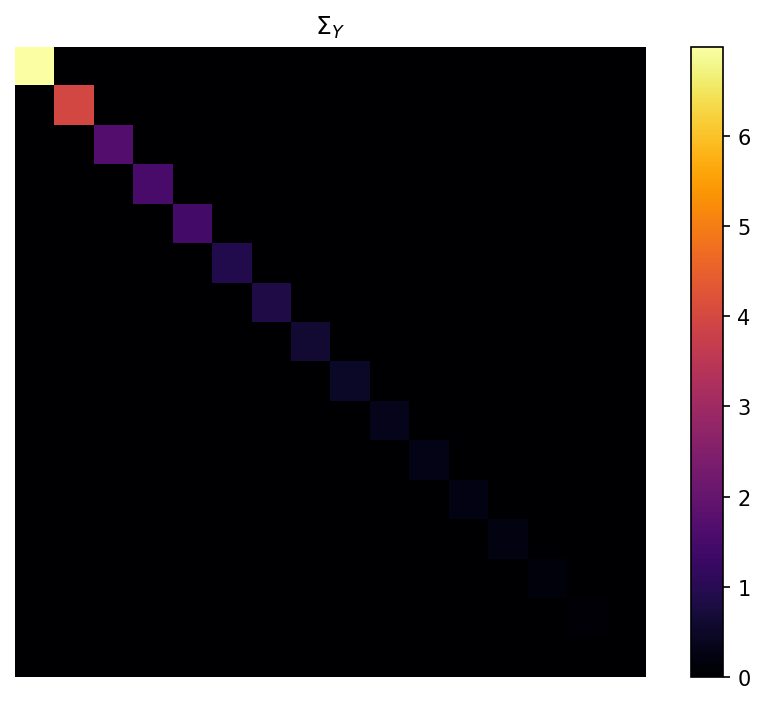

In [17]:
plot_cov(cov_Y, title="$\Sigma_Y$")

It is clear that only the first few principal components are dominating the variance in the data. But by how much?

We can either calculate this on our own.

In [18]:
expl_var = np.diag(cov_Y)/cov_Y.sum()

Or retrieve the explained variances from the `pca` object.

In [19]:
expl_var_skl = pca.explained_variance_ratio_

Both are indead identical.

In [20]:
np.allclose(expl_var, expl_var_skl)

True

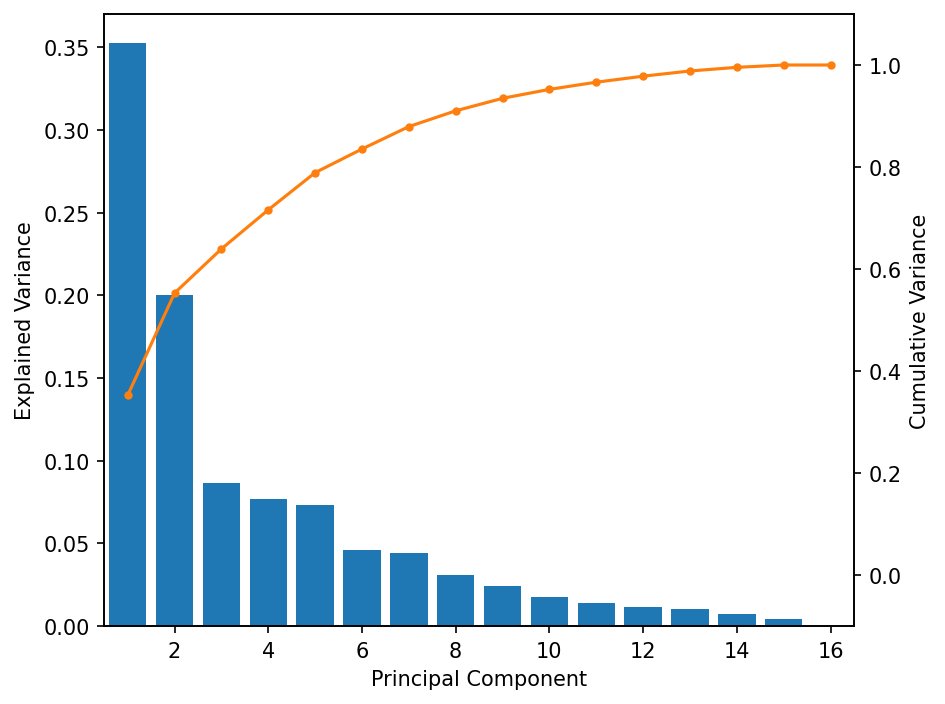

In [21]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111)
ax.bar(np.arange(N)+1, expl_var_skl)
ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance")
ax.set_xlim(0.5, N+0.5)
axr = ax.twinx()
axr.plot(np.arange(N)+1, expl_var_skl.cumsum(), ".-", c="C1")
axr.set_ylabel("Cumulative Variance")
axr.set_ylim(-0.1, 1.1)
fig.tight_layout()

In [22]:
from IPython.display import Markdown as md

In [23]:
msg = "The first two principal components already account for {:4.1f}% of the total variance.".format(expl_var_skl[:2].sum()*100)
md(msg)

The first two principal components already account for 55.3% of the total variance.

We can now plot the first two principal components.

In [24]:
colors = {
    u"Zusammen Bayern": "#3f6597",
    u"Die PARTEI":      "#cc4e53",
    u"mut":             "#41969f",
    u"Volt":            "#4e237d",
    u"Die Linke":       "#b53360",
    u"Grüne":           "#60a961",
    u"SPD":             "#e53e44",
    u"Rosa Liste":      "#e20072",
    u"Freie Wähler":    "#f28112",
    u"ÖDP":             "#f5a14d",
    u"Fair":            "#2dcede",
    u"München-Liste":   "#5487c9",
    u"Bayernpartei":    "#285c6f",
    u"FDP":             "#f6ce5e",
    u"CSU":             "#333333",
    u"AfD":             "#4093b2"
}

In [36]:
results = {
    u"Zusammen Bayern":  0.3,
    u"Die PARTEI":       1.3,
    u"mut":              0.6,
    u"Volt":             1.8,
    u"Die Linke":        3.3,
    u"Grüne":           29.1,
    u"SPD":             22.0,
    u"Rosa Liste":       1.0,
    u"Freie Wähler":     2.5,
    u"ÖDP":              4.0,
    u"Fair":             0.4,
    u"München-Liste":    0.8,
    u"Bayernpartei":     0.7,
    u"FDP":              3.5,
    u"CSU":             24.7,
    u"AfD":              3.9,
}

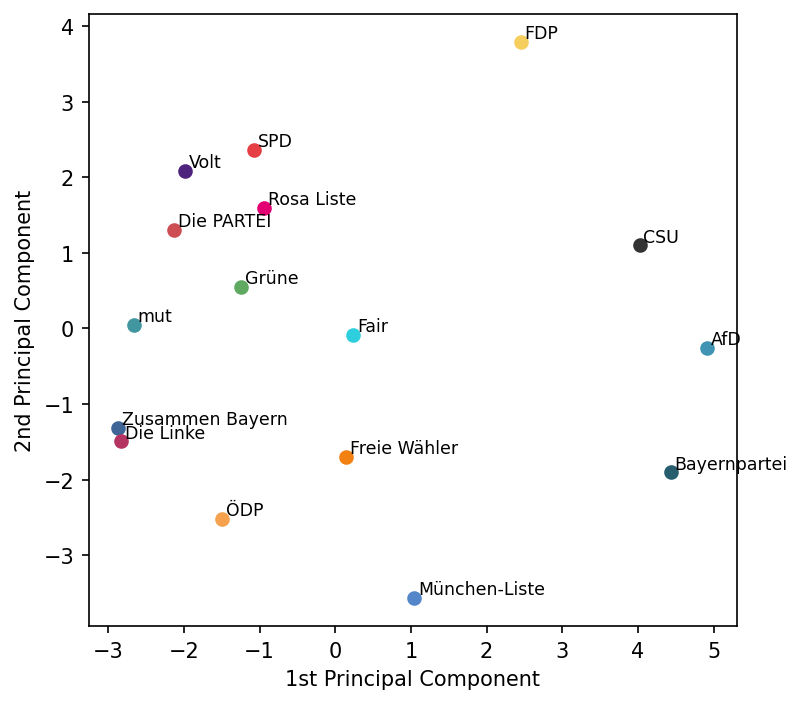

In [53]:
offset = 0.05
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, aspect=1.)
for i, key in enumerate(data):
    ax.plot(Y[i, 0], Y[i, 1], "o", c=colors[key])
    ax.text(Y[i, 0]+offset, Y[i, 1]+offset, key, fontsize="small")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
fig.tight_layout()

Or with the marker sizes representing the results.

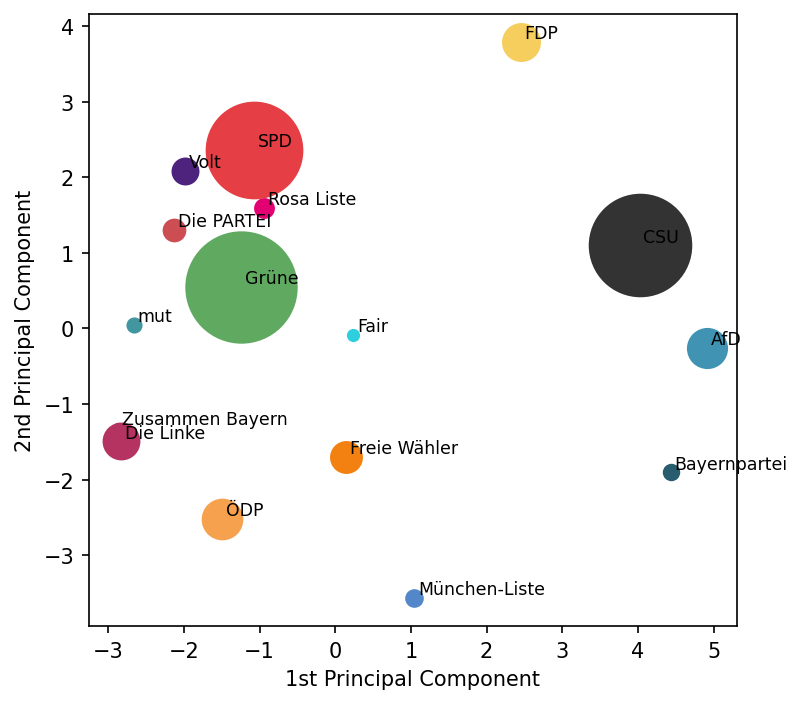

In [61]:
offset = 0.05
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, aspect=1.)
for i, key in enumerate(data):
    ax.plot(Y[i, 0], Y[i, 1], "o", c=colors[key], markeredgecolor="none", markersize=10.*np.sqrt(results[key]))
    ax.text(Y[i, 0]+offset, Y[i, 1]+offset, key, fontsize="small")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
fig.tight_layout()

Amazingly, the 1st principal component pretty much matches the classical "left-right" classification of the German political langscape without putting any of this information into the analysis.

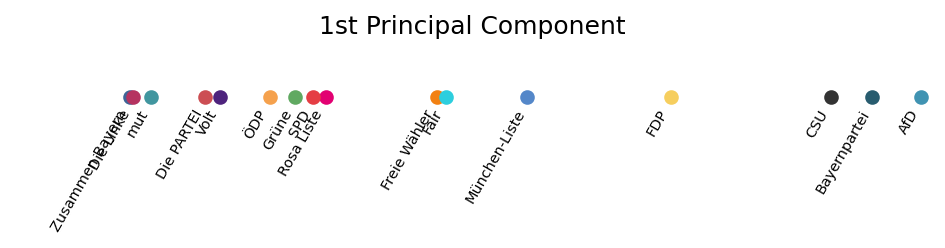

In [26]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, aspect=1)
for i, key in enumerate(data):
    ax.plot(Y[i, 0], 0., "o", c=colors[key])
    ax.text(Y[i, 0], -0.1, key, rotation=60, ha="right", va="top", fontsize="x-small")
ax.set_xlim(-4, 5)
ax.set_ylim(-1, 0.5)
ax.axis("off")
ax.set_title("1st Principal Component")
fig.tight_layout()

But what do these components actually mean in terms of the political statements?  
For this we have to analyze the eigenvectors of the principal component analysis, which are also stored in the `pca` object. This is equivalent to the matrix $\mathbb{E}$ in the previous notebook.

In [27]:
E = pca.components_.T

This matrix can be used to transform the data into the eigensystem.

In [28]:
Y_confirm = (X-X.mean(0)) @ E

In [29]:
np.allclose(Y, Y_confirm)

True

The eigenvectors hold information how much each feature (the political statements) contribute to the principal components.  
We can sort these by contribution to the principal components. Remember to take into account the shift by the mean of every feature.

In [30]:
A = np.array([1., 0., -1])
comp1 = (A[:, None] - X.mean(0)) * E[:, 0]
idx1 = comp1[0, :].argsort()
comp1[0, :] = comp1[0, :][idx1]
comp1[1, :] = comp1[1, :][idx1]
comp1[2, :] = comp1[2, :][idx1]

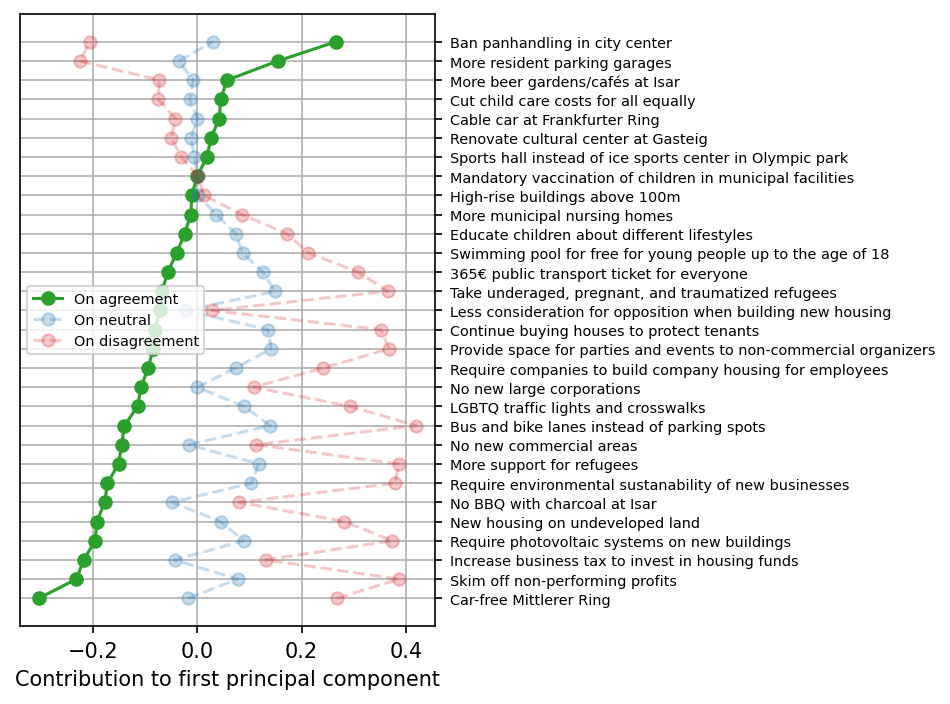

In [31]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111)
ax.plot(comp1[0, :], np.arange(Q), "o-",  c="C2", label="On agreement")
ax.plot(comp1[1, :], np.arange(Q), "o--", c="C0", label="On neutral", alpha=0.25)
ax.plot(comp1[2, :], np.arange(Q), "o--", c="C3", label="On disagreement", alpha=0.25)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_yticks(np.arange(Q))
ax.set_yticklabels(short[idx1], fontsize="x-small")
ax.set_xlabel("Contribution to first principal component")
ax.grid()
ax.legend(loc="center left", fontsize="x-small")
fig.tight_layout()

We can do the same for the second component to try to understand what contributes to it.

In [32]:
A = np.array([1., 0., -1])
comp2 = (A[:, None] - X.mean(0)) * E[:, 1]
idx2 = comp2[0, :].argsort()
comp2[0, :] = comp2[0, :][idx2]
comp2[1, :] = comp2[1, :][idx2]
comp2[2, :] = comp2[2, :][idx2]

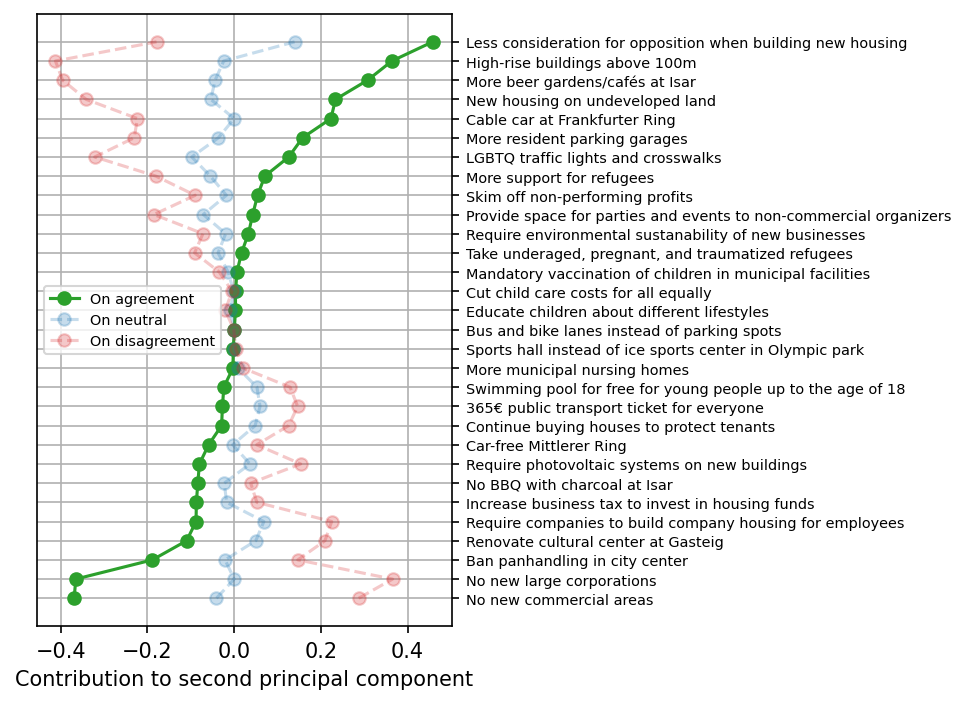

In [33]:

fig = plt.figure(dpi=150)
ax = fig.add_subplot(111)
ax.plot(comp2[0, :], np.arange(Q), "o-",  c="C2", label="On agreement")
ax.plot(comp2[1, :], np.arange(Q), "o--", c="C0", label="On neutral", alpha=0.25)
ax.plot(comp2[2, :], np.arange(Q), "o--", c="C3", label="On disagreement", alpha=0.25)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_yticks(np.arange(Q))
ax.set_yticklabels(short[idx2], fontsize="x-small")
ax.set_xlabel("Contribution to second principal component")
ax.grid()
ax.legend(loc="center left", fontsize="x-small")
fig.tight_layout()

It is also possible to transfer another vector (someone else's political views) into the eigensystem.

In this example another person answered the statements with the following vector.

In [34]:
X_person = np.array([ 1, 0, 0, -1, -1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Y_person = pca.transform(X_person[None, :])

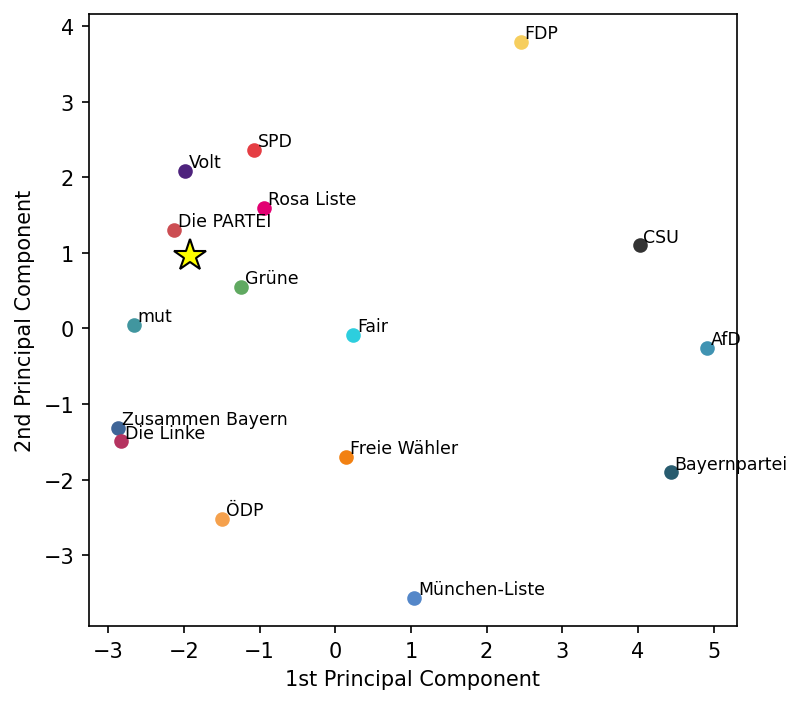

In [35]:
offset = 0.05
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, aspect=1.)
for i, key in enumerate(data):
    ax.plot(Y[i, 0], Y[i, 1], "o", c=colors[key])
    ax.text(Y[i, 0]+offset, Y[i, 1]+offset, key, fontsize="small")
ax.plot(Y_person[0, 0], Y_person[0, 1], "*", markersize=16, c="yellow", markeredgecolor="black")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
fig.tight_layout()